In [27]:
import plumed
colvar=plumed.read_as_pandas("COLVAR_driver")
colvar

/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  


,time,eta6,torsave,N1H61,N1H62,lambda,metad1D.bias,metad2D.bias
0,0.0,1.754513,1.201449,-1.879936,0.575991,0.0,1365.265754,38.253751
1,1.0,2.428227,2.488240,-0.645416,2.540304,15.0,1174.230463,59.208895
2,2.0,2.728948,2.661313,-0.742772,2.854417,13.0,1171.209993,72.732468
3,3.0,2.948717,3.056262,0.085405,2.993652,13.0,1171.209993,88.292661
4,4.0,3.031252,3.042034,-0.198341,-3.131528,10.0,1214.893719,92.874880
...,...,...,...,...,...,...,...,...
159996,159996.0,0.405585,0.409743,-2.682906,0.364961,4.0,1340.041722,92.276942
159997,159997.0,-0.865737,-1.150579,2.135666,-1.589712,11.0,1185.284866,21.701612
159998,159998.0,-0.511305,-0.325543,2.878314,-0.202765,15.0,1174.230463,85.654407
159999,159999.0,0.070077,0.066900,-2.929293,-0.081711,13.0,1171.209993,92.353686


Text(0, 0.5, 'N1--C10')

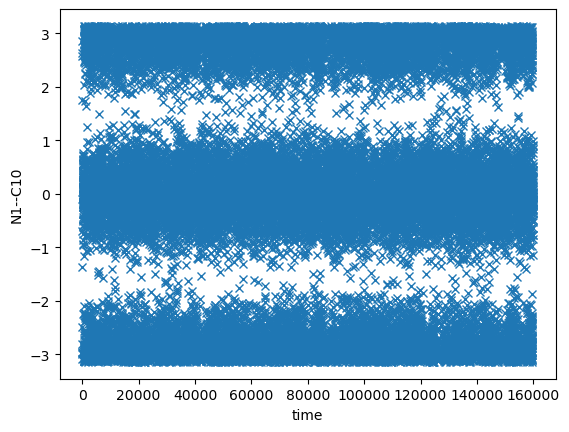

In [28]:
import matplotlib.pyplot as plt
plt.plot(colvar["time"][::5],colvar["eta6"][::5],"x")
plt.xlabel("time")
plt.ylabel("N1--C10")

Text(0, 0.5, 'lambda')

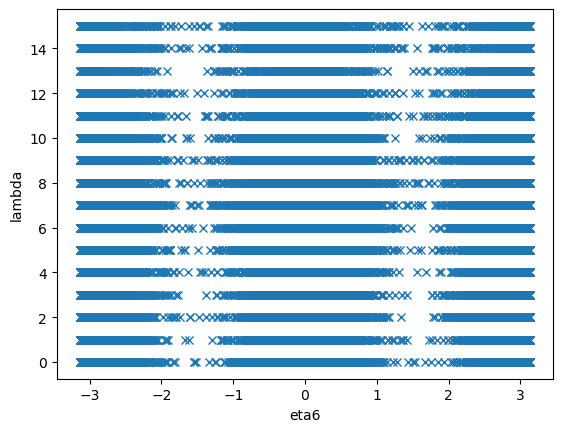

In [29]:
plt.plot(colvar["eta6"][::5],colvar["lambda"][::5],"x")
plt.xlabel("eta6")
plt.ylabel("lambda")

Text(0, 0.5, 'lambda')

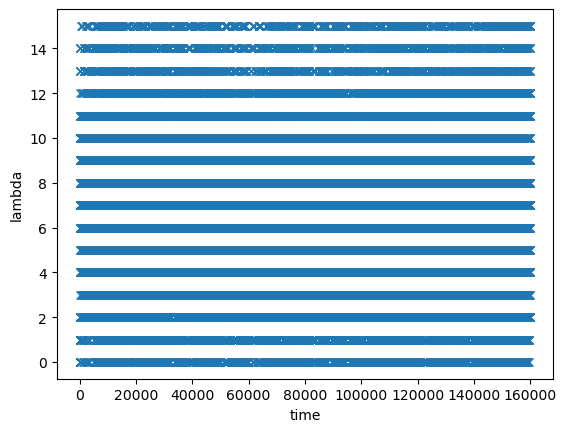

In [30]:
plt.plot(colvar["time"][::5],colvar["lambda"][::5],"x")
plt.xlabel("time")
plt.ylabel("lambda")

Here I read the COLVAR_driver file and compute the weights

In [137]:
import plumed
import numpy as np
wes=plumed.read_as_pandas("COLVAR_driver")
wes["weight"]=np.exp((wes["metad2D.bias"]+wes["metad1D.bias"])/2.494)
wes

/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  This is separate from the ipykernel package so we can avoid doing imports until


,time,eta6,torsave,N1H61,N1H62,lambda,metad1D.bias,metad2D.bias,weight
0,0.0,1.754513,1.201449,-1.879936,0.575991,0.0,1365.265754,38.253751,2.528584e+244
1,1.0,2.428227,2.488240,-0.645416,2.540304,15.0,1174.230463,59.208895,6.107294e+214
2,2.0,2.728948,2.661313,-0.742772,2.854417,13.0,1171.209993,72.732468,4.119213e+216
3,3.0,2.948717,3.056262,0.085405,2.993652,13.0,1171.209993,88.292661,2.110569e+219
4,4.0,3.031252,3.042034,-0.198341,-3.131528,10.0,1214.893719,92.874880,5.360738e+227
...,...,...,...,...,...,...,...,...,...
159996,159996.0,0.405585,0.409743,-2.682906,0.364961,4.0,1340.041722,92.276942,2.617217e+249
159997,159997.0,-0.865737,-1.150579,2.135666,-1.589712,11.0,1185.284866,21.701612,1.511672e+210
159998,159998.0,-0.511305,-0.325543,2.878314,-0.202765,15.0,1174.230463,85.654407,2.460124e+219
159999,159999.0,0.070077,0.066900,-2.929293,-0.081711,13.0,1171.209993,92.353686,1.075398e+220


Here I Compute DeG syn/anti for lambda=0 case (standard adenine). Expected value is 0 for simmetry

In [138]:
import math

Wa=0
Wb=0

for i in range(np.size(wes["time"])):
    if wes["lambda"][i]==0:
     
        
        if(wes["eta6"][i] < math.pi/2 and wes["eta6"][i] > -math.pi/2):
            Wa += wes["weight"][i]
        else:
            Wb += wes["weight"][i]
print(-2.494*math.log(Wa/Wb)) 

0.12690346394425653


Here I Compute DeG syn/anti for lambda=1 case (m6A). Expected value is about 6 kJ/mol

In [162]:
import math

Wa=0
Wb=0

for i in range(np.size(wes["time"])):
    if wes["lambda"][i]==15.0:
     
        
        if(wes["eta6"][i] < math.pi/2 and wes["eta6"][i] > -math.pi/2):
            Wa += wes["weight"][i]
        else:
            Wb += wes["weight"][i]
print(2.494*math.log(Wa/Wb)) 

5.462906807361699


Here I Compute DeG between lambda=1 and lambda=0, separatingly for syn and anti, so this results can be directly compared with DeGs obtained with HREX in syn or anti

In [140]:
import math

Wa=0
Wb=0
Wc=0
Wd=0

for i in range(int(np.size(wes["time"])/2),np.size(wes["time"])):
    if(wes["eta6"][i] < math.pi/2 and wes["eta6"][i] > -math.pi/2):
        if wes["lambda"][i]==15.0:
             Wa += wes["weight"][i]
        if wes["lambda"][i]==0:
             Wb += wes["weight"][i]
                
    else:
                if wes["lambda"][i]==15.0:
                    Wc += wes["weight"][i]
                if wes["lambda"][i]==0:
                    Wd += wes["weight"][i]

print(-2.494*math.log(Wa/Wb))                     
print(-2.494*math.log(Wc/Wd)) 

207.44662917036098
212.8850892075366


Here I Compute Total DeG between lambda=1 and lambda=0.   To have the DeDeG between m6A and duplex I need to take the difference between the DeG obtained here and the omologue in the duplex case

In [141]:
import math

Wa=0
Wb=0


for i in range(np.size(wes["time"])):
    if wes["lambda"][i]==15.0:
         Wa += wes["weight"][i]
    if wes["lambda"][i]==0:
         Wb += wes["weight"][i]


print(-2.494*math.log(Wa/Wb))                     
 

208.8997734503674


In the following I compute statistical erros with boostrapping for all the quantities computed above. I try different Number of blocks and then I consider tha maximum error obtained.

In [35]:
err=[]
for Nb in (2, 5, 10, 50, 100, 200, 500, 1000):
    DeGs=[]
    for k in range(200):

        sample=np.random.choice(Nb,size=Nb)

        Lboos=np.array(wes["lambda"][1:]).reshape(Nb,-1)[sample,:].reshape(-1)
        Eboos=np.array(wes["eta6"][1:]).reshape(Nb,-1)[sample,:].reshape(-1)
        Wboos=np.array(wes["weight"][1:]).reshape(Nb,-1)[sample,:].reshape(-1)

        Wa=[]
        Wb=[]

        for i in range(np.size(Lboos)):
            if Lboos[i]==15:
                if Eboos[i] < math.pi/2 and Eboos[i] > -math.pi/2:
                    Wa.append(Wboos[i])
                else:
                    Wb.append(Wboos[i])
        DeGs.append(-2.5*math.log(np.sum(Wa)/np.sum(Wb))) 
    
    err.append((Nb,np.std(DeGs)))
err    

[(2, 0.020949134249676864),
 (5, 0.30728101324630847),
 (10, 0.3495161538000167),
 (50, 0.3224429979905722),
 (100, 0.30628362361461353),
 (200, 0.3220770887287841),
 (500, 0.32343312703187393),
 (1000, 0.2578626873755068)]

In [36]:
err1=[]
err2=[]
for Nb in (2, 5, 10, 50, 100, 200, 500, 1000, 2000, 5000):
    DeGs1=[]
    DeGs2=[]
    for k in range(200):

        sample=np.random.choice(Nb,size=Nb)

        Lboos=np.array(wes["lambda"][1:]).reshape(Nb,-1)[sample,:].reshape(-1)
        Eboos=np.array(wes["eta6"][1:]).reshape(Nb,-1)[sample,:].reshape(-1)
        Wboos=np.array(wes["weight"][1:]).reshape(Nb,-1)[sample,:].reshape(-1)

        Wa=[]
        Wb=[]
        Wc=[]
        Wd=[]

        for i in range(np.size(Lboos)):
            if(Eboos[i] < math.pi/2 and Eboos[i] > -math.pi/2):
                if Lboos[i]==15.0:
                     Wa.append(Wboos[i])
                if Lboos[i]==0:
                     Wb.append(Wboos[i])
                
            else:
                    if Lboos[i]==15.0:
                        Wc.append(Wboos[i])
                    if Lboos[i]==0:
                        Wd.append(Wboos[i])


        DeGs1.append(-2.5*math.log(np.sum(Wa)/np.sum(Wb))) 
        DeGs2.append(-2.5*math.log(np.sum(Wc)/np.sum(Wd)))
        
    
    err1.append((Nb,np.std(DeGs1)))
    err2.append((Nb,np.std(DeGs2)))

In [40]:
err1

[(2, 0.058743295891416414),
 (5, 0.11020039205578647),
 (10, 0.16745857047636198),
 (50, 0.18459041288942707),
 (100, 0.18534101304778342),
 (200, 0.20704535335841256),
 (500, 0.19353492758506977),
 (1000, 0.20229252155450014),
 (2000, 0.1722773425591187),
 (5000, 0.17290687274283584)]

In [39]:
err2

[(2, 0.05752904261648957),
 (5, 0.21171466672265424),
 (10, 0.2056631410412617),
 (50, 0.23886421148445136),
 (100, 0.20009333222056466),
 (200, 0.21887604613824918),
 (500, 0.2149181580927136),
 (1000, 0.2200995433547115),
 (2000, 0.19655087630520937),
 (5000, 0.17765278233277815)]

In [41]:
err3=[]
for Nb in (2, 5, 10, 50, 100, 200, 500, 1000, 2000, 5000):
    DeGs1=[]
    DeGs2=[]
    for k in range(200):

        sample=np.random.choice(Nb,size=Nb)

        Lboos=np.array(wes["lambda"][1:]).reshape(Nb,-1)[sample,:].reshape(-1)
        Eboos=np.array(wes["eta6"][1:]).reshape(Nb,-1)[sample,:].reshape(-1)
        Wboos=np.array(wes["weight"][1:]).reshape(Nb,-1)[sample,:].reshape(-1)

        Wa=[]
        Wb=[]
        Wc=[]
        Wd=[]

        for i in range(np.size(Lboos)):
        
            if Lboos[i]==15.0:
                 Wa.append(Wboos[i])
            if Lboos[i]==0:
                 Wb.append(Wboos[i])
           


        DeGs1.append(-2.5*math.log(np.sum(Wa)/np.sum(Wb))) 
 
        
    
    err3.append((Nb,np.std(DeGs1)))
err3

[(2, 0.007021391849835099),
 (5, 0.12424717447870415),
 (10, 0.1867452542543539),
 (50, 0.16447106424418736),
 (100, 0.173583646127971),
 (200, 0.18730461100598644),
 (500, 0.17721385351069),
 (1000, 0.17648641651991792),
 (2000, 0.1677236102050322),
 (5000, 0.14643752998049217)]

The following part you can skip

In [142]:
import math

wei1D=np.zeros(16)

for i in range(np.size(wes["time"])):

    wei1D[int( wes["lambda"][i])]+=wes["weight"][i]
                

In [143]:
wei2D=np.zeros(1600)

for i in range(np.size(wes["time"])):
    j=int(50*(wes["eta6"][i]+math.pi)/math.pi)  
    wei2D[100*int(wes["lambda"][i])+j]+=wes["weight"][i]
    

In [144]:
wei2D_b=np.zeros(800)

for i in range(np.size(wes["time"])):
    j=int(25*(wes["eta6"][i]+math.pi)/math.pi)  
    wei2D_b[50*int(wes["lambda"][i])+j]+=wes["weight"][i]

In [145]:
wei2D_c=np.zeros(400)

for i in range(np.size(wes["time"])):
    j=int(12.5*(wes["eta6"][i]+math.pi)/math.pi)  
    wei2D_c[25*int(wes["lambda"][i])+j]+=wes["weight"][i]

In [146]:
fes_50=-2.494*np.log(wei2D_b)
fes_25=-2.494*np.log(wei2D_c)

In [147]:
fes_1D=-2.494*np.log(wei1D)

In [148]:
fes_1D[15]-fes_1D[0]

208.89977345036732

In [60]:
fes2D=plumed.read_as_pandas("../fitA_m6A_metad1D2D/fes.dat")

/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  """Entry point for launching an IPython kernel.


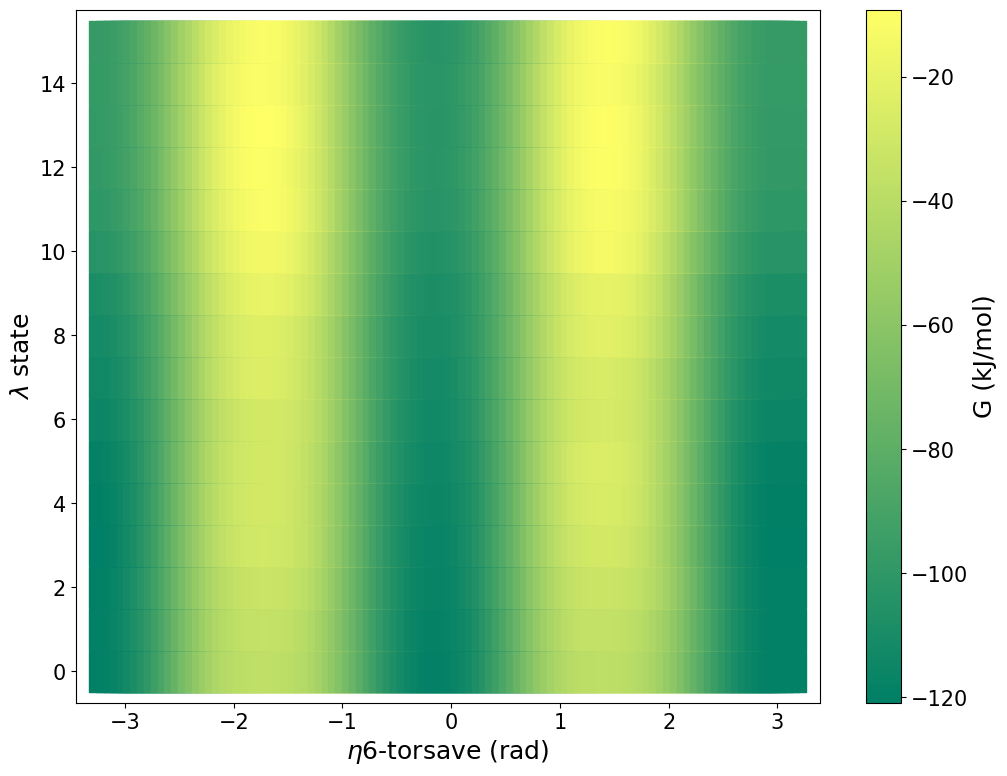

In [149]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(12,9))
ax = plt.axes()


# Data for three-dimensional scattered points
zdata =  fes2D["file.free"]
xdata = fes2D["torsave"]
ydata = fes2D["lambda"]

ax.set_xlabel(r'$\eta$6-torsave (rad)', fontsize=18)
ax.set_ylabel(r'$\lambda$ state', fontsize=18)
#ax.set_xscale('log')
#ax.set_yscale('symlog', linthreshy=0.001)

ax.tick_params(axis='both', which='major', labelsize=15)

#ax.set_zscale('log')
#ax.xaxis._set_scale('log')
pnt3d=ax.scatter(xdata, ydata, c=zdata, marker='s', s=860, cmap='summer');
#pnt3d=ax.contourf(xdata, ydata, zdata, cmap='hot')
cbar=plt.colorbar(pnt3d, aspect=20)
cbar.ax.tick_params(labelsize=15) 
cbar.set_label('G (kJ/mol)', fontsize=18)


plt.show()

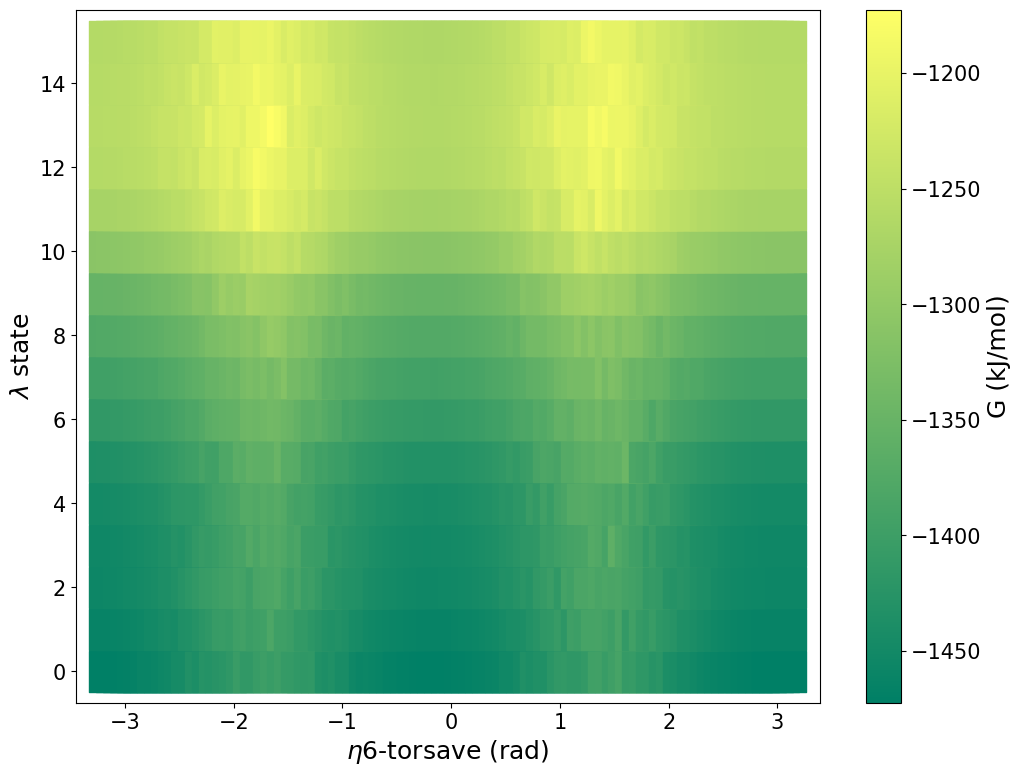

In [150]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(12,9))
ax = plt.axes()


# Data for three-dimensional scattered points
zdata =  fes_rew
xdata = fes2D["torsave"]
ydata = fes2D["lambda"]

ax.set_xlabel(r'$\eta$6-torsave (rad)', fontsize=18)
ax.set_ylabel(r'$\lambda$ state', fontsize=18)
#ax.set_xscale('log')
#ax.set_yscale('symlog', linthreshy=0.001)

ax.tick_params(axis='both', which='major', labelsize=15)

#ax.set_zscale('log')
#ax.xaxis._set_scale('log')
pnt3d=ax.scatter(xdata, ydata, c=zdata, marker='s', s=860, cmap='summer');
#pnt3d=ax.contourf(xdata, ydata, zdata, cmap='hot')
cbar=plt.colorbar(pnt3d, aspect=20)
cbar.ax.tick_params(labelsize=15) 
cbar.set_label('G (kJ/mol)', fontsize=18)


plt.show()

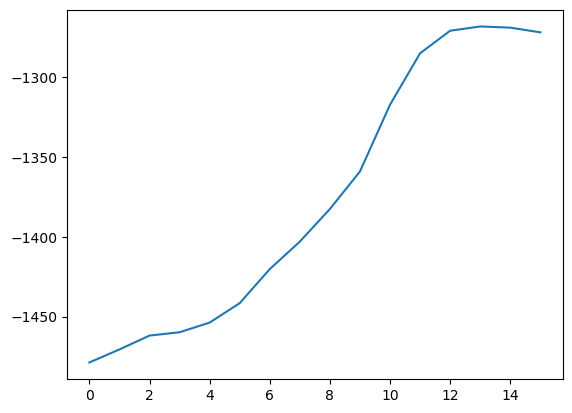

In [151]:
xdata=fes2D["torsave"][:100]
ydata=np.linspace(0,15,16)
zdata=np.zeros((100,16))
for i in range(16):
    for j in range(100):
        zdata[j][i]=fes_rew[i*100+j]
Glam=np.zeros(16)
for i in range(len(zdata[0])):
    Glam[i]=-2.476*np.log(np.sum(np.exp(-(1/2.476)*zdata[:,i])))
    
plt.plot(ydata,Glam)

In [152]:
shift_free=np.zeros(len(fes2D['lambda']))
for i in range(len(fes2D['lambda'])):
    shift_free[i]=fes_rew[i]-Glam[int(fes2D['lambda'][i])]

shift_free_50=np.zeros(int(len(fes2D['lambda'])/2))
for i in range(int(len(fes2D['lambda'])/2)):
    shift_free_50[i]=fes_50[i]-Glam[int(fes2D['lambda'][i*2])] 
    
shift_free_25=np.zeros(int(len(fes2D['lambda'])/4))
for i in range(int(len(fes2D['lambda'])/4)):
    shift_free_25[i]=fes_25[i]-Glam[int(fes2D['lambda'][i*4])]        

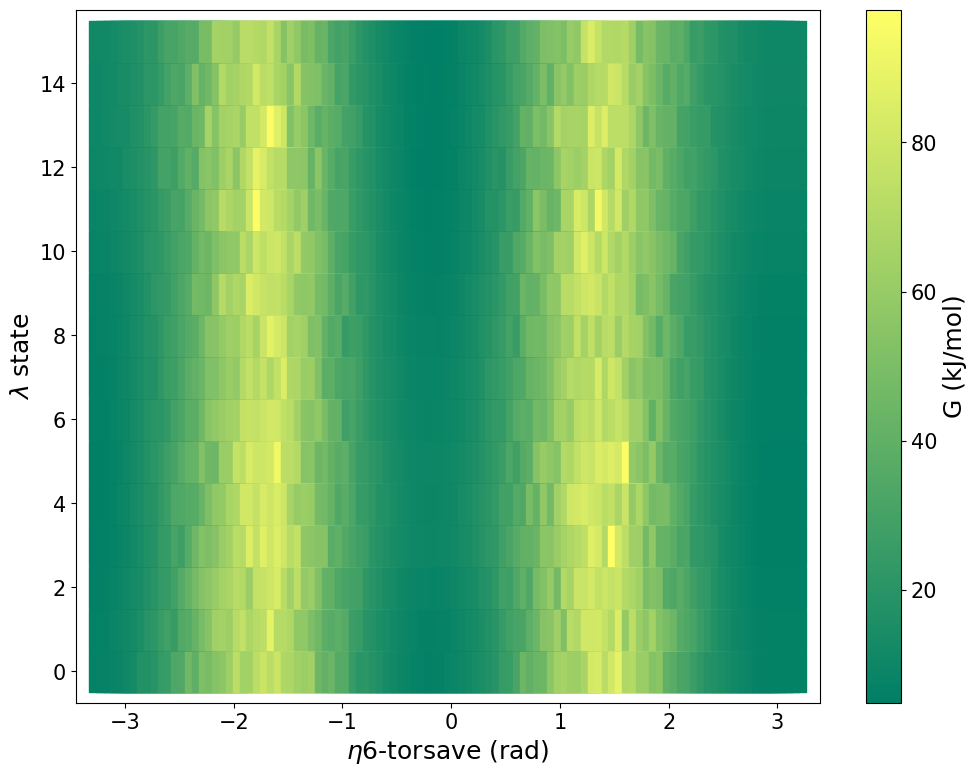

In [153]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(12,9))
ax = plt.axes()


# Data for three-dimensional scattered points
zdata =  shift_free
xdata = fes2D["torsave"]
ydata = fes2D["lambda"]

ax.set_xlabel(r'$\eta$6-torsave (rad)', fontsize=18)
ax.set_ylabel(r'$\lambda$ state', fontsize=18)
#ax.set_xscale('log')
#ax.set_yscale('symlog', linthreshy=0.001)

ax.tick_params(axis='both', which='major', labelsize=15)

#ax.set_zscale('log')
#ax.xaxis._set_scale('log')
pnt3d=ax.scatter(xdata, ydata, c=zdata, marker='s', s=860, cmap='summer');
#pnt3d=ax.contourf(xdata, ydata, zdata, cmap='hot')
cbar=plt.colorbar(pnt3d, aspect=20)
cbar.ax.tick_params(labelsize=15) 
cbar.set_label('G (kJ/mol)', fontsize=18)


plt.show()

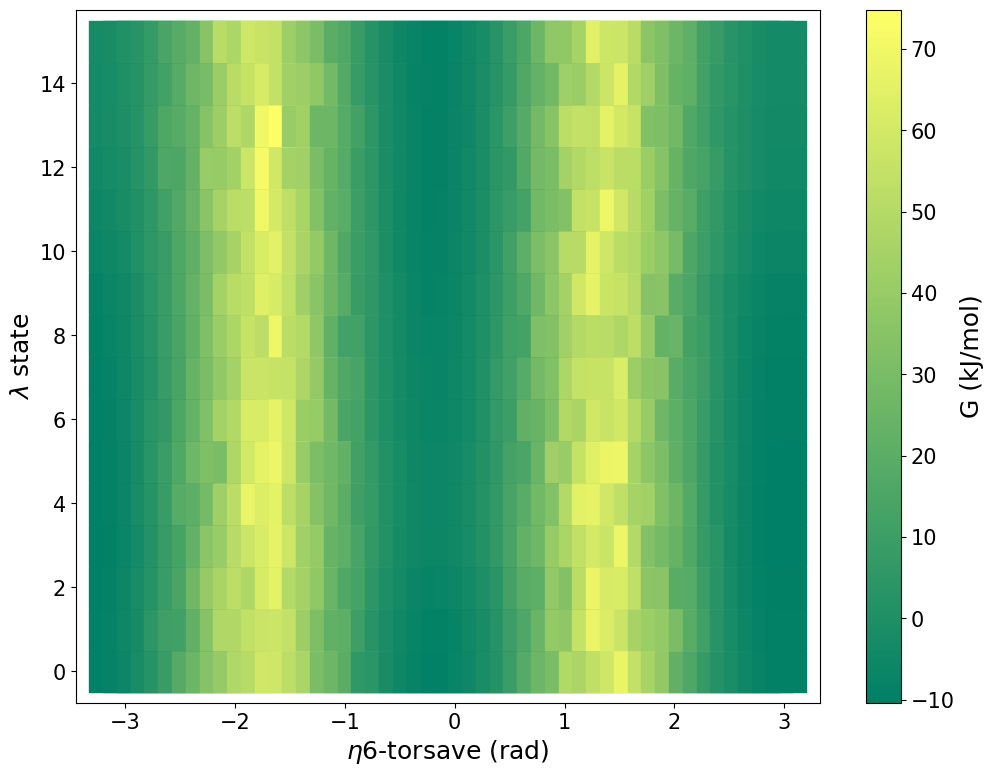

In [154]:
plt.figure(figsize=(12,9))
ax = plt.axes()


# Data for three-dimensional scattered points
zdata =  shift_free_50
xdata = fes2D["torsave"][::2]
ydata = fes2D["lambda"][::2]

ax.set_xlabel(r'$\eta$6-torsave (rad)', fontsize=18)
ax.set_ylabel(r'$\lambda$ state', fontsize=18)
#ax.set_xscale('log')
#ax.set_yscale('symlog', linthreshy=0.001)

ax.tick_params(axis='both', which='major', labelsize=15)

#ax.set_zscale('log')
#ax.xaxis._set_scale('log')
pnt3d=ax.scatter(xdata, ydata, c=zdata, marker='s', s=860, cmap='summer');
#pnt3d=ax.contourf(xdata, ydata, zdata, cmap='hot')
cbar=plt.colorbar(pnt3d, aspect=20)
cbar.ax.tick_params(labelsize=15) 
cbar.set_label('G (kJ/mol)', fontsize=18)


plt.show()

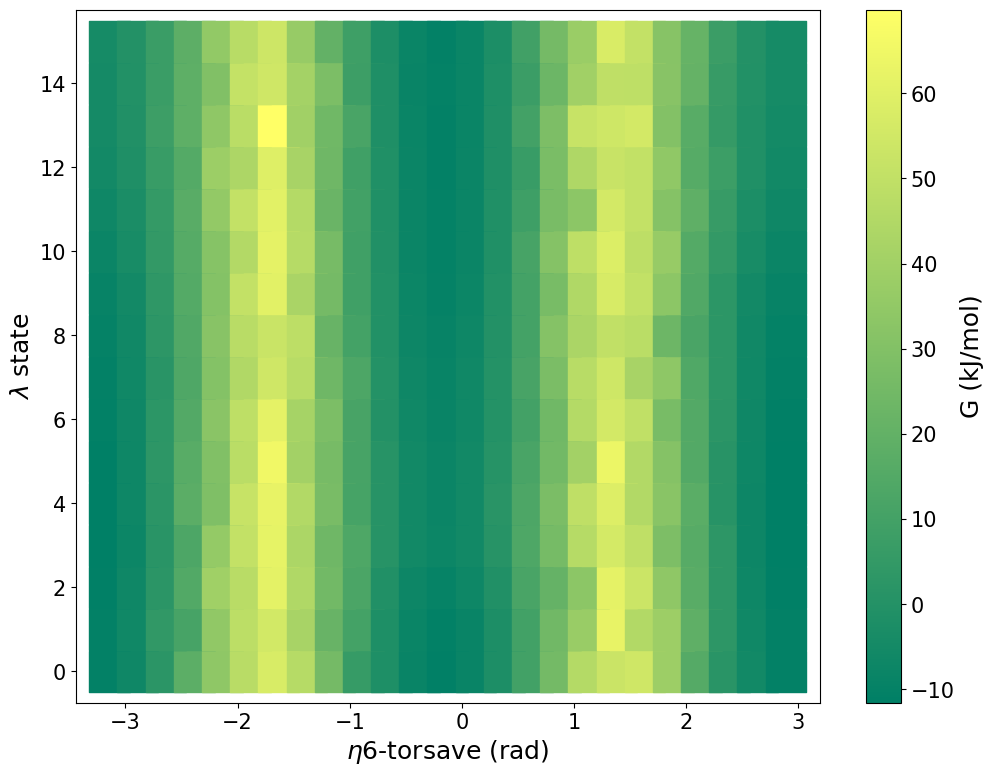

In [155]:
plt.figure(figsize=(12,9))
ax = plt.axes()


# Data for three-dimensional scattered points
zdata =  shift_free_25
xdata = fes2D["torsave"][::4]
ydata = fes2D["lambda"][::4]

ax.set_xlabel(r'$\eta$6-torsave (rad)', fontsize=18)
ax.set_ylabel(r'$\lambda$ state', fontsize=18)
#ax.set_xscale('log')
#ax.set_yscale('symlog', linthreshy=0.001)

ax.tick_params(axis='both', which='major', labelsize=15)

#ax.set_zscale('log')
#ax.xaxis._set_scale('log')
pnt3d=ax.scatter(xdata, ydata, c=zdata, marker='s', s=860, cmap='summer');
#pnt3d=ax.contourf(xdata, ydata, zdata, cmap='hot')
cbar=plt.colorbar(pnt3d, aspect=20)
cbar.ax.tick_params(labelsize=15) 
cbar.set_label('G (kJ/mol)', fontsize=18)


plt.show()

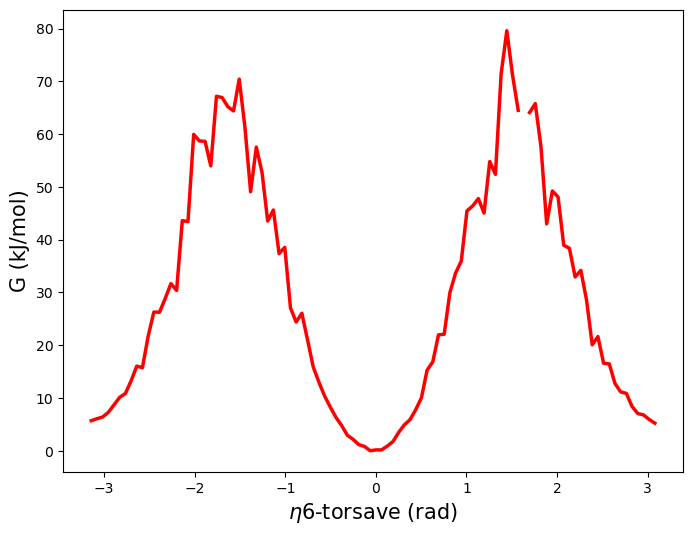

In [156]:
#plotting slices of the 2D profile corresponding to lambda=1
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

plt.xlabel(r'$\eta$6-torsave (rad)', fontsize=15)
plt.ylabel("G (kJ/mol)", fontsize=15)

plt.plot(fes2D["torsave"][-100:],fes_rew[-100:]-np.min(fes_rew[-100:]),color='red',linewidth =2.5, label="m6A")


plt.show()

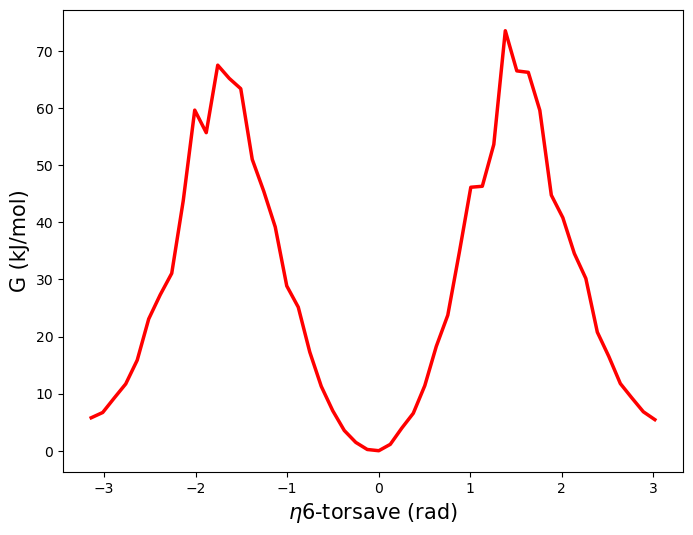

In [157]:
#plotting slices of the 2D profile corresponding to lambda=1
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

plt.xlabel(r'$\eta$6-torsave (rad)', fontsize=15)
plt.ylabel("G (kJ/mol)", fontsize=15)

plt.plot(fes2D["torsave"][-100::2],fes_50[-50:]-np.min(fes_50[-50:]),color='red',linewidth =2.5, label="m6A")


plt.show()

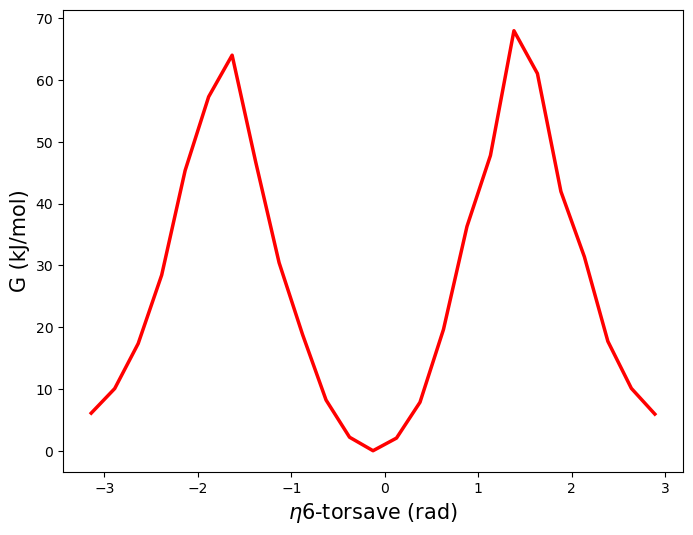

In [158]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

plt.xlabel(r'$\eta$6-torsave (rad)', fontsize=15)
plt.ylabel("G (kJ/mol)", fontsize=15)

plt.plot(fes2D["torsave"][-100::4],fes_25[-25:]-np.min(fes_25[-25:]),color='red',linewidth =2.5, label="m6A")


plt.show()

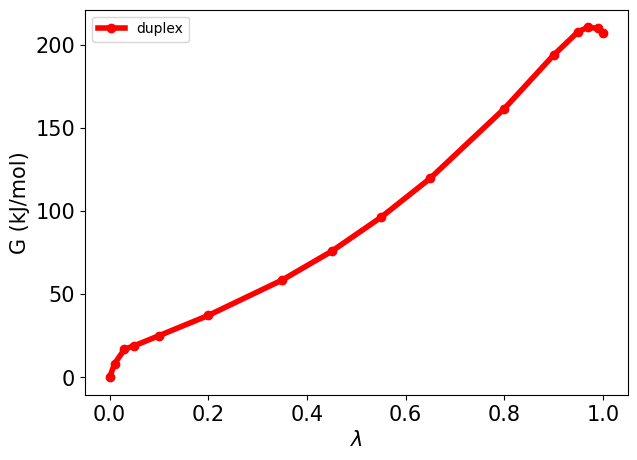

In [159]:
lambdas=[0.00, 0.01, 0.03, 0.05, 0.10, 0.20, 0.35, 0.45, 0.55, 0.65, 0.80, 0.90, 0.95, 0.97, 0.99, 1.00]

plt.figure(figsize=(7, 5))
plt.ylabel("G (kJ/mol)", fontsize=15)
plt.xlabel(r'$\lambda$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot(lambdas,Glam-np.min(Glam), 'o-', linewidth=4, color='r', label="duplex")
#plt.plot(lambdas,m6A_pr, 'o-', linewidth=4, color='b', label="m6A")
plt.legend()

In [161]:
np.save("lambda_profile_rew_m6A",Glam-np.min(Glam))